###  CODSOFT TASK 2

###  MOVIE RATING PREDICTION WITH PYTHON

#### NAME : Ashwini G
#### BATCH : A11
#### DOMAIN : Data Science

##### Aim : Build a model predicts the rating of the movie with features like Genre, Actors, Directors, Movie names , Year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\IMDb Movies India.csv.csv')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15509, 10)

In [4]:
df.duplicated().value_counts()

False    15503
True         6
Name: count, dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(15503, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  object 
 2   Duration  7239 non-null   object 
 3   Genre     13627 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14979 non-null  object 
 7   Actor 1   13888 non-null  object 
 8   Actor 2   13122 non-null  object 
 9   Actor 3   12363 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(5659, 10)

In [10]:
df.isnull().value_counts()

Name   Year   Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  Actor 3
False  False  False     False  False   False  False     False    False    False      5659
Name: count, dtype: int64

In [11]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb=LabelEncoder()
df['Votes']=lb.fit_transform(df['Votes'])
df['Duration']=lb.fit_transform(df['Duration'])


In [14]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,49.706485,5.898533,1051.721682
std,19.741839,40.810725,1.381165,551.591951
min,1931.000000,0.000000,1.100000,0.000000
25%,1983.000000,25.000000,5.000000,541.000000
50%,2002.000000,39.000000,6.100000,1042.000000
75%,2013.000000,58.000000,6.900000,1531.000000
max,2021.000000,173.000000,10.000000,2026.000000


In [15]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=True)

Year
1932     411.000000
1933     411.000000
1941     536.800000
1937     667.666667
1944     725.000000
           ...     
1950    1271.277778
1952    1272.062500
1948    1332.500000
1947    1446.833333
1945    1718.333333
Name: Votes, Length: 91, dtype: float64

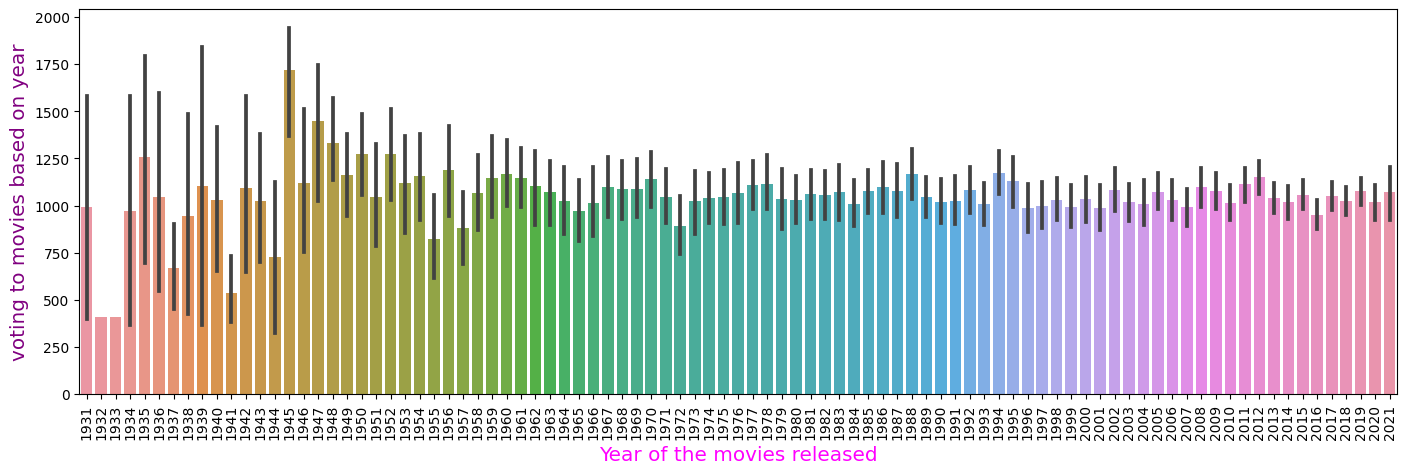

In [16]:
plt.figure(figsize=(17,5))
sns.barplot(x='Year',y='Votes',data=df)
plt.xlabel('Year of the movies released',fontsize='x-large',color='magenta')
plt.ylabel('voting to movies based on year',fontsize='x-large',color='purple')
plt.xticks(rotation=90)
plt.show()

In [17]:
df['Rating'].unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

In [18]:
df['Rating']=df['Rating'].round().astype(int)

In [19]:
df['Rating'].unique()

array([ 7,  4,  5,  6,  8,  3,  2,  9,  1, 10])

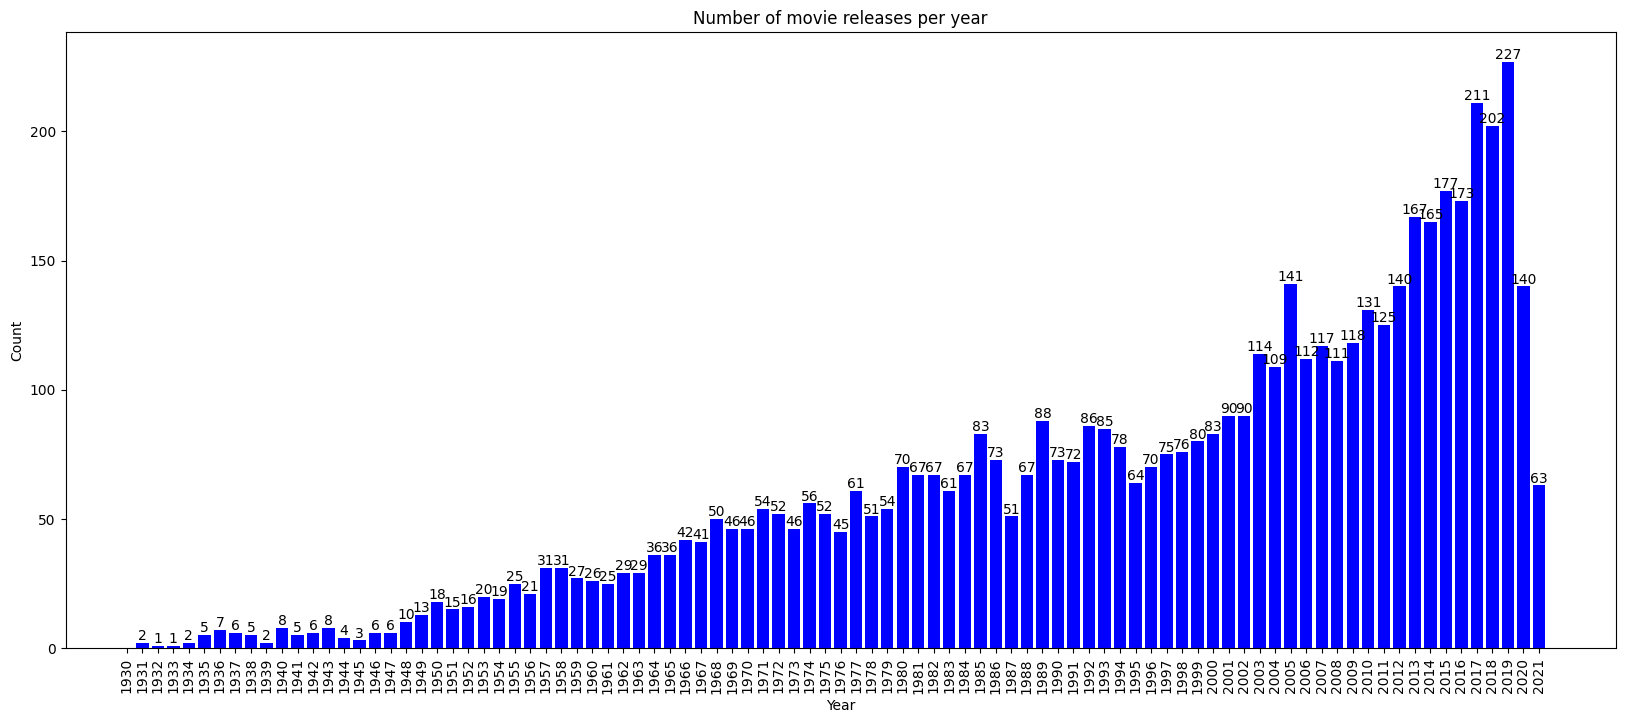

In [20]:
year_count = df.groupby('Year').size().reset_index(name='count')

plt.figure(figsize=(20, 8))
bars = plt.bar(year_count['Year'], year_count['count'], color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of movie releases per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(1930, 2022), rotation=90)
plt.show()

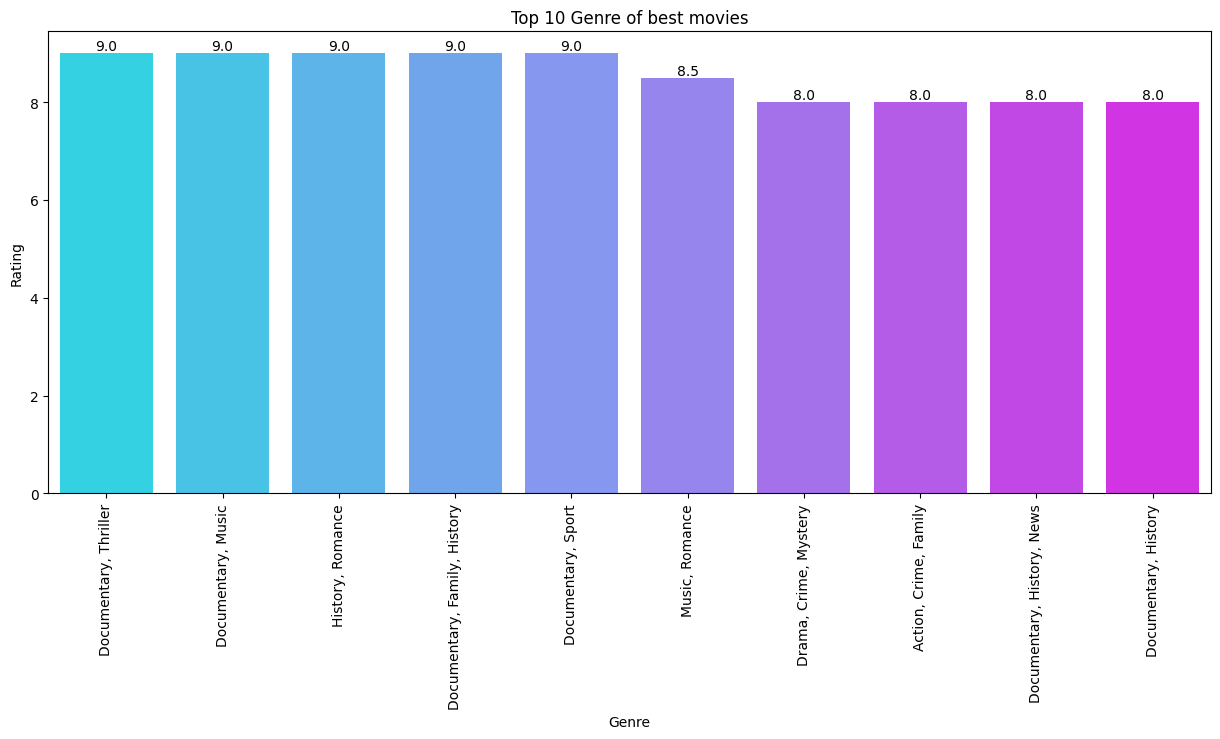

In [21]:
top_10_genres= df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).reset_index().head(10)

plt.figure(figsize=(15,6))
sns.barplot(data=top_10_genres, y='Rating', x='Genre', palette='cool')
plt.title('Top 10 Genre of best movies')
plt.xticks(rotation=90)

for index, value in enumerate(top_10_genres['Rating']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

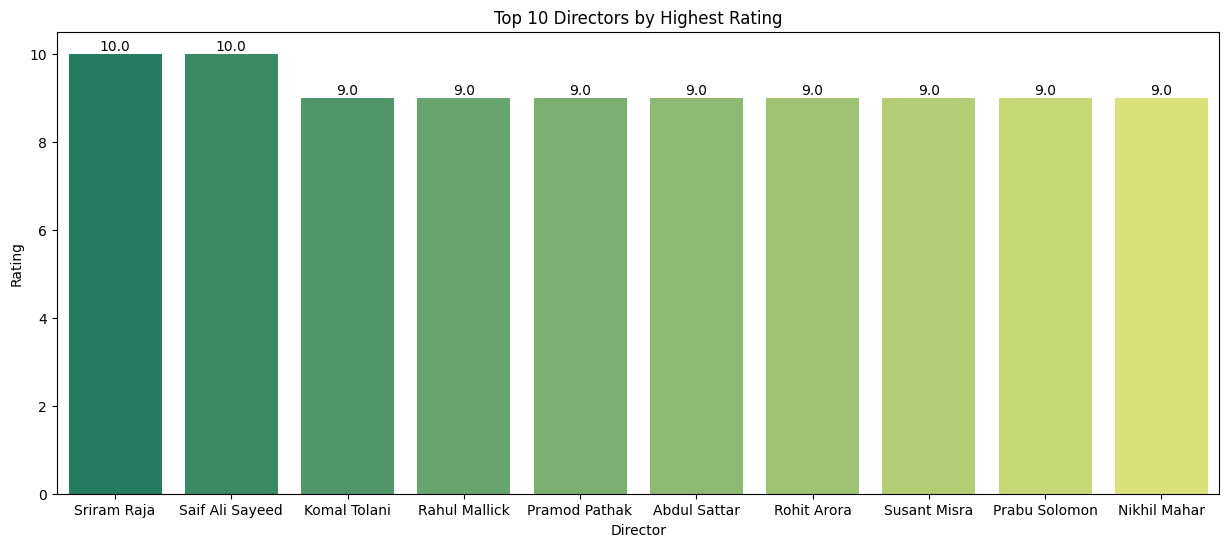

In [22]:
top_10_directors= df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).reset_index().head(10)

plt.figure(figsize=(15,6))
sns.barplot(data=top_10_directors, y='Rating', x='Director', palette='summer')
plt.title('Top 10 Directors by Highest Rating')

for index, value in enumerate(top_10_directors['Rating']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

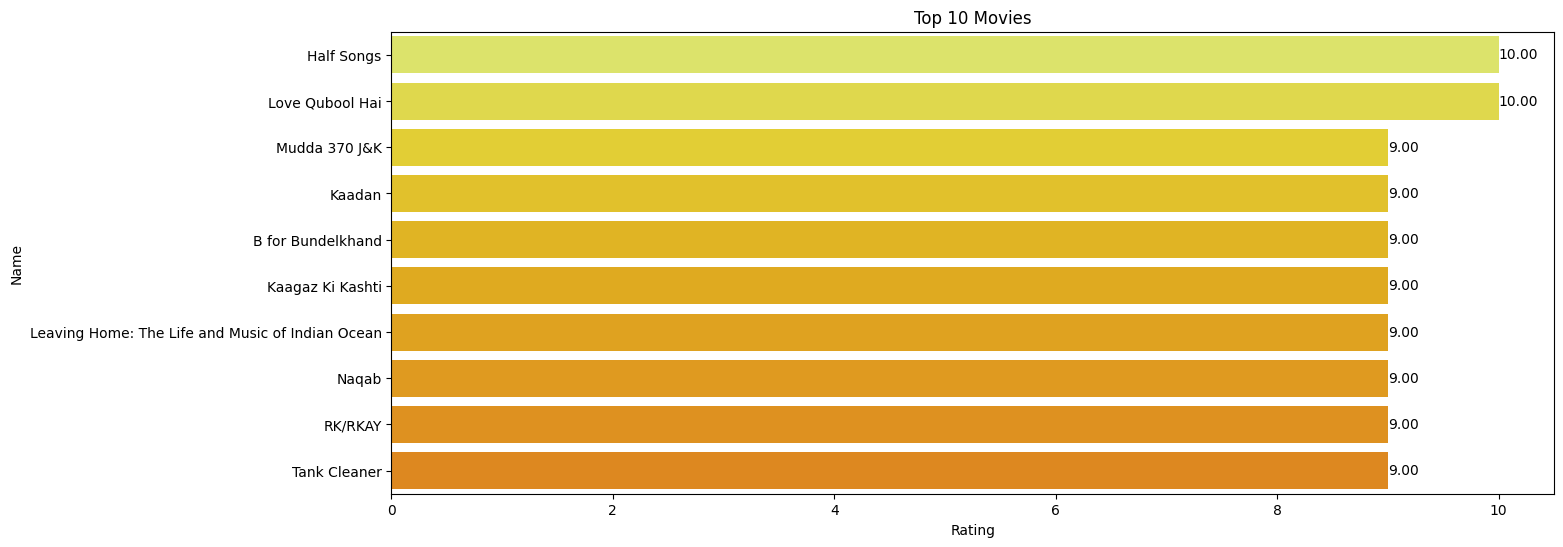

In [23]:
top_10_movies= df.groupby('Name').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).reset_index().head(10)

plt.figure(figsize=(15,6))
sns.barplot(data=top_10_movies, x='Rating', y='Name', palette='Wistia',color='blue')
plt.title('Top 10 Movies')

for index, value in enumerate(top_10_movies['Rating']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')
    
plt.show()

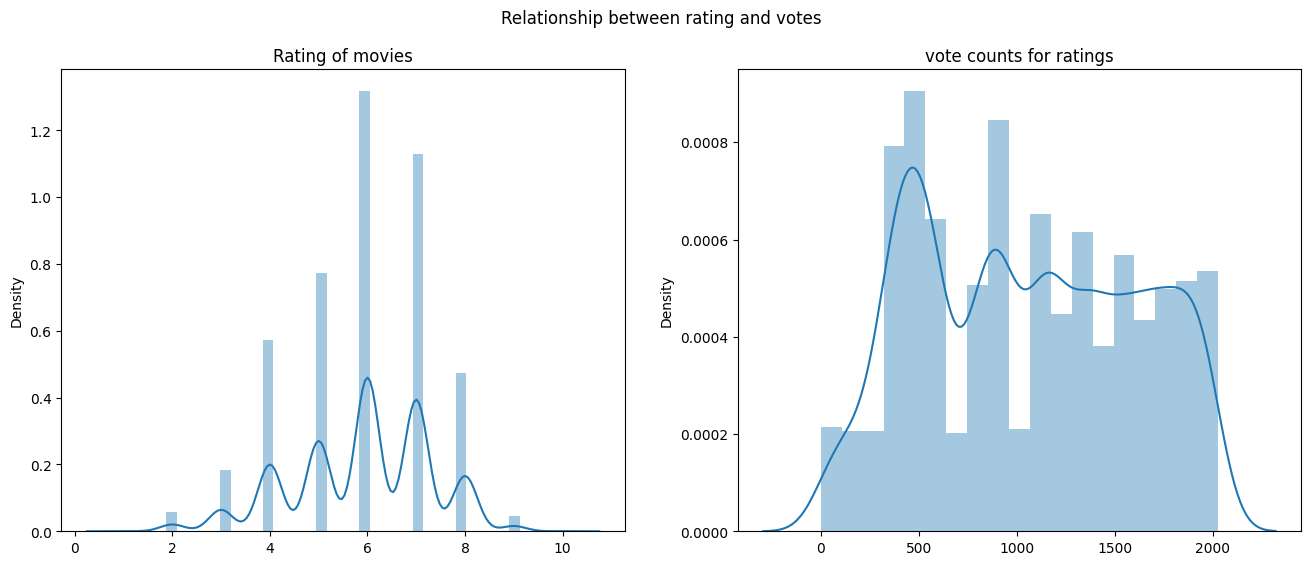

In [24]:
fig=plt.figure(figsize=(16,6))
fig.suptitle('Relationship between rating and votes')
plt.subplot(1,2,1)
sns.distplot(df[['Rating']]).set_title('Rating of movies')
plt.subplot(1,2,2)
sns.distplot(df[['Votes']]).set_title('vote counts for ratings')
plt.show()

In [25]:
df.drop(['Actor 1','Actor 2','Actor 3','Director','Name'],axis=1,inplace=True)

In [26]:
df['Genre']=lb.fit_transform(df['Genre'])

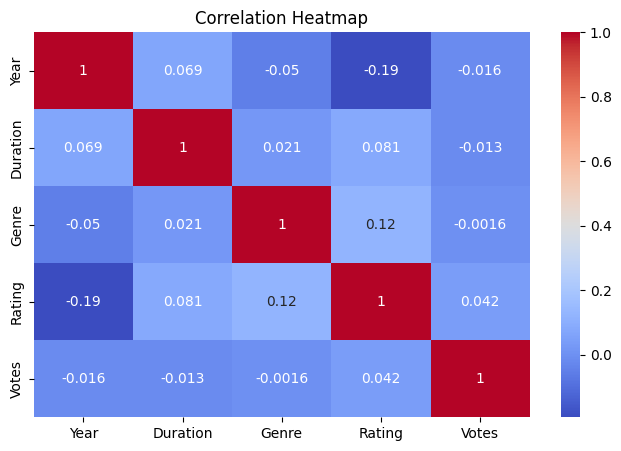

In [27]:
correlation_matrix=df.corr()
plt.figure(figsize=(8,5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
x=df.drop(['Rating'],axis=1)
y=df['Rating']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5659, 4)
(5659,)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3961, 4)
(1698, 4)
(3961,)
(1698,)


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def eval_class(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    
    print('Mean Absolute Error :', mae)
    print('Mean Squared Error : ',mse)
    print('Root of Mean Squared Eror :', rmse)
    print('R2_Score :', r2)
    
def model(train_test):
    print('Training score: ',train_test.score(x_train,y_train))
    print('Testing Score',train_test.score(x_test,y_test))
    

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(n_jobs=1000)
lin_reg.fit(x_train,y_train)
ypred_lin_reg=lin_reg.predict(x_test)
model(lin_reg)

Training score:  0.060998609959523664
Testing Score 0.057326187921820426


In [32]:
eval_class(y_test,ypred_lin_reg)

Mean Absolute Error : 1.0790007016908536
Mean Squared Error :  1.8207105401072265
Root of Mean Squared Eror : 1.3493370743099096
R2_Score : 0.057326187921820426


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor(max_depth=200,max_features=100,min_samples_split=500,min_samples_leaf=500,random_state=42,criterion='squared_error')
dtree_reg.fit(x_train,y_train)
ypred_dtree_reg=dtree_reg.predict(x_test)
model(dtree_reg)

Training score:  0.13524303280404848
Testing Score 0.11057455295507379


In [34]:
eval_class(y_test,ypred_dtree_reg)

Mean Absolute Error : 1.0493764688992513
Mean Squared Error :  1.717864934111458
Root of Mean Squared Eror : 1.3106734658607604
R2_Score : 0.11057455295507379


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=10,max_features=100,n_estimators=1500,learning_rate=0.05,subsample=0.8,min_samples_split=500,min_samples_leaf=500,random_state=42)
gbr.fit(x_train,y_train)
ypred_gbr=gbr.predict(x_test)
model(gbr)

Training score:  0.270777921620736
Testing Score 0.16674282327329237


In [36]:
eval_class(y_test,ypred_gbr)

Mean Absolute Error : 1.0070644145349195
Mean Squared Error :  1.6093797290726963
Root of Mean Squared Eror : 1.2686133095126728
R2_Score : 0.16674282327329237


In [37]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
ypred_adr=adr.predict(x_test)
model(adr)

Training score:  0.1582244880633199
Testing Score 0.10778414798180436


In [38]:
eval_class(y_test,ypred_adr)

Mean Absolute Error : 1.0540472541259451
Mean Squared Error :  1.723254412084543
Root of Mean Squared Eror : 1.312727851492663
R2_Score : 0.10778414798180436


In [39]:
def reg_eval_metrics(y, ypred):
    r2 = r2_score(y, ypred)
    return r2

r2_score_result = reg_eval_metrics(y_test, ypred_lin_reg)
print("R2_SCORE of Linear regressor", r2_score_result)

r2_score_result = reg_eval_metrics(y_test, ypred_dtree_reg)
print("R2_SCORE of DecisiontreeRegressor", r2_score_result)

r2_score_result = reg_eval_metrics(y_test, ypred_gbr)
print("R2_SCORE of Gradientboost", r2_score_result)

r2_score_result = reg_eval_metrics(y_test, ypred_adr)
print("R2_SCORE of Adaboost", r2_score_result)

R2_SCORE of Linear regressor 0.057326187921820426
R2_SCORE of DecisiontreeRegressor 0.11057455295507379
R2_SCORE of Gradientboost 0.16674282327329237
R2_SCORE of Adaboost 0.10778414798180436


#### Choosing best model as Gradient boosting regressor, which has comparitively high R2 score and less in mean absolute error , mean squared error and rmse. 

#### I predicted the rating using Gradient boosting regressor model

In [40]:
df['Predicted_Rating']=gbr.predict(x)
random_df=df.sample(n=20,random_state=42)
random_df

,Year,Duration,Genre,Rating,Votes,Predicted_Rating
10971,1990,59,38,6,436,5.443152
14052,2014,167,229,2,574,6.216747
10002,1992,32,229,4,1944,5.826584
3970,1993,80,38,4,616,5.594930
8840,2014,30,131,7,1383,5.761795
5071,2016,27,28,6,1296,5.892633
2709,2016,34,110,9,1682,5.955360
11842,2018,1,370,4,944,5.492844
10910,1990,27,214,7,490,5.507682
4485,1969,50,246,7,806,6.613143


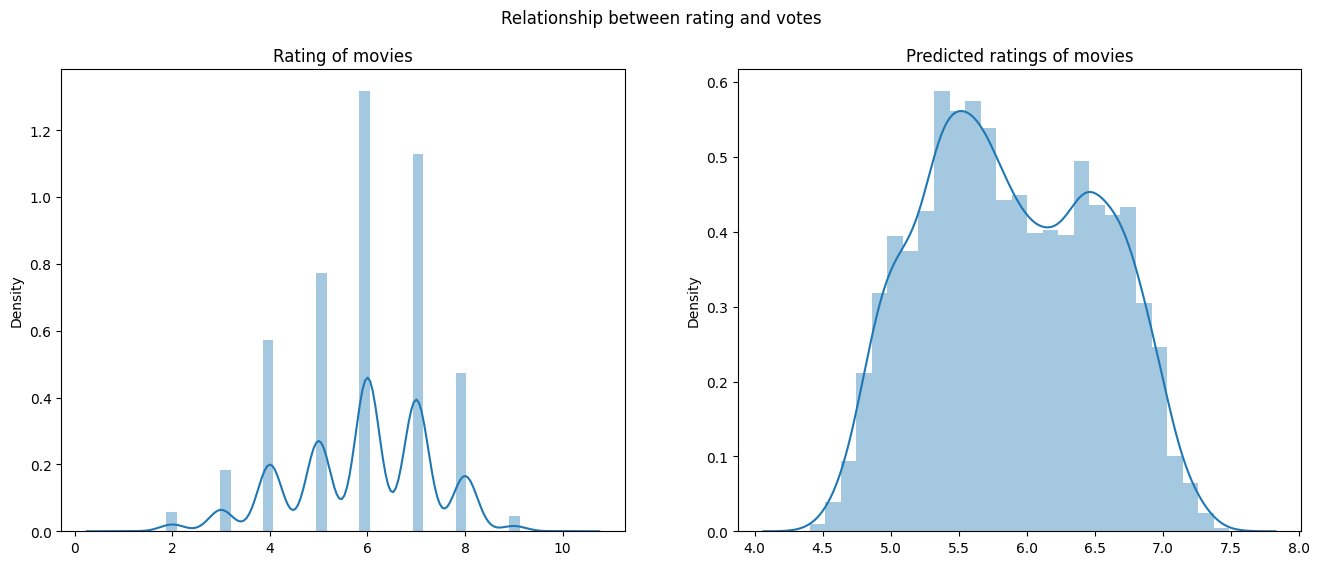

In [41]:
fig=plt.figure(figsize=(16,6))
fig.suptitle('Relationship between rating and votes')
plt.subplot(1,2,1)
sns.distplot(df[['Rating']]).set_title('Rating of movies')
plt.subplot(1,2,2)
sns.distplot(df[['Predicted_Rating']]).set_title('Predicted ratings of movies')
plt.show()